## #Detecting Hate Speech and Offensive Language

In [976]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords as st
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer as hv
from sklearn.feature_extraction.text import TfidfVectorizer
import contractions
from sklearn.naive_bayes import MultinomialNB

In [824]:
import math
#from __future__ import division
from os import listdir
import string

In [825]:
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import wordnet
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
#from spellchecker import SpellChecker
nltk.download('stopwords')
pd.options.mode.chained_assignment = None

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Thosiba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thosiba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [826]:
import numpy as np
import pandas as pd
import re
import spacy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [827]:
from collections import Counter
from wordcloud import WordCloud

In [1104]:
raw = pd.read_csv('labeled_data.csv', index_col=[0])

In [1105]:
df = raw[['class', 'tweet']]
df.sample(6)

,class,tweet
6512,1,@kade_melton he triesto cause drama between pe...
920,1,"#porn,#android,#iphone,#ipad,#sex,#xxx, | #Sma..."
14733,1,RT @BigggDickBandit: You lil stupid ass bitch ...
1533,1,&#8220;@SAADTHESAV: bitches saying ray rice go...
15901,1,RT @Httpjaebee: hoes Be going through depressi...
7902,1,Alright your time is up RT @EvilJeanyis: Chees...


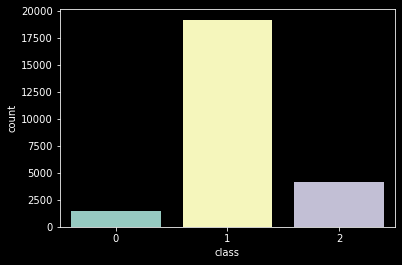

In [495]:
sns.countplot(df['class'])
plt.show()

In [934]:
df.iloc[51:61, :]

,class,tweet
51,1,""" yall niggas b cuffing hoes cause yall aint n..."
52,1,""" you dodge a bullet "" &#128517; &#8220;@DaRea..."
53,1,""" young Pill Chamberlain these bitches love my..."
54,1,"""&#128514;&#128514;&#128514;&#128514;&#128514;..."
55,1,"""&#128514;&#128514;&#128514;&#128514;&#128514;..."
56,1,"""&#128514;&#128514;&#128514;@The_Paradox: And ..."
57,1,"""&amp; he's gone always be a hoe"""
58,1,"""...Son of a bitch took my Tic Tacs.""\n\nI lik..."
59,1,"""..All I wanna do is get money and fuck model ..."
60,1,"""@2015seniorprobs: I probably wouldn&#8217;t m..."


In [1106]:
df['tweet'].values[50:200] #sample tweets

array(['" we dont trust these niggas all these bitches "',
       '" yall niggas b cuffing hoes cause yall aint never have bitches "',
       '" you dodge a bullet " &#128517; &#8220;@DaRealKha: "All da bitches I cut off pregnant or bound to be ....thank God &#128591;"&#8221;',
       '" young Pill Chamberlain these bitches love my music "',
       '"&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;@VandalSavage_: Teanna Trump probably cleaner than most of these twitter hoes but........."',
       '"&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;@DaHomieFuzz: Gay niggas couldn\'t wait to act like bitches tonight"',
       '"&#128514;&#128514;&#128514;@The_Paradox: And ima steal his cat n replace it with a pitbull &#128514;&#128514;&#128514;&#128514; RT @80sbaby4life: @The_Paradox He a bitch you should do it"',
       '"&amp; he\'s gone always be a hoe"',
       '"...Son of a bitch took my Tic T

### Removing Noise

In [1107]:
def tweetLowercase(col: str):
    df[col] = df[col].str.lower()

tweetLowercase('tweet')

In [1108]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df['tweet'] = df['tweet'].apply(lambda tweet: remove_urls(tweet))

In [1109]:
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text) 

df['tweet'] = df['tweet'].apply(lambda tweet: remove_html(tweet))

In [1110]:
def expand_contractions(text):
    expanded_text = contractions.fix(text) 
    return expanded_text

df["tweet"] = df["tweet"].apply(lambda tweet: expand_contractions(tweet))

In [1111]:
STOPWORDS = set(st.words('english'))
def remove_stopwords(text):
    return " ".join([token for token in str(text).split() if token not in STOPWORDS])

df["tweet"] = df["tweet"].apply(lambda tweet: remove_stopwords(tweet))

In [1112]:
def remove_digits(text):
    return " ".join([token for token in str(text).split() if token.isalpha()])

df["tweet"] = df["tweet"].apply(lambda tweet: remove_digits(tweet))

In [1113]:
def removeSingleLetters(text):
    return " ".join([token for token in str(text).split() if len(token)>2])

df["tweet"] = df["tweet"].apply(lambda tweet: removeSingleLetters(tweet))

In [1155]:
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])

def remove_rarewords(text):
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df["tweet"] = df["tweet"].apply(lambda tweet: remove_rarewords(tweet))

In [1114]:
def rem_https(text):
    return " ".join([re.sub(r"https?://[A-Za-z0-9./]+", '', word) for word in str(text).split()])

df["tweet"] = df["tweet"].apply(lambda tweet: rem_https(tweet))

In [1115]:
df["tweet"] = df["tweet"].apply(lambda tweet: re.sub(r"https?", '', tweet))

In [ ]:
#text = re.sub('\s\s+',' ',text) #multiple whitespace

#### Stemming

In [247]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Thosiba\AppData\Roaming\nltk_data...


True

In [1079]:
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["tweet"] = df["tweet"].apply(lambda tweet: stem_words(tweet))

In [1154]:
cnt = Counter()
for text in df["tweet"].values:
    for word in text.split(): #we've got quite a few spelling errors
        cnt[word] += 1
cnt.most_common(10)        

[('bitch', 6749),
 ('bitches', 2677),
 ('like', 2674),
 ('hoes', 1977),
 ('pussy', 1731),
 ('got', 1585),
 ('hoe', 1483),
 ('ass', 1472),
 ('get', 1413),
 ('fuck', 1311)]

In [1117]:
def new_func(text):
    return " ".join([word for word in text.split() if word!='lol' and word!='one'])

df["tweet"] = df["tweet"].apply(lambda tweet: new_func(tweet))

In [1118]:
df['tweet'].values[100:300] 

array(['lmaooooooooooo nigga want likes depressing',
       'girl know spitting shit going plz',
       'let make couple tweets cuzzo get twitter bitch trick',
       'harlem shake excuse full retard',
       'amen miley need act like hoe foh',
       'loyal female wayyyyy better hoes idc', 'pussy licking meow meow',
       'check even faggot fans stands',
       'happen vixen ent got ran threw side like foothill bitch',
       'bitch okay nudes pat wow', 'fucking blacklisted holding anyway',
       'fuck wrong nobody knows', 'shut make bitch', 'hate type',
       'got bitches ever top', 'baseball season love started',
       'little stupid bitch fuck',
       'really asked dead ass serious could say', 'early bird night wise',
       'overdosing heavy drugs sound bad pussy shit every',
       'pit bulls photographed lovely fairy tale creatures fairy tale',
       'tweet', 'long lakers trash could hahaha',
       'say anything kiss faggot',
       'play cheat wear khaki coloured haircut

In [1083]:
def get_wordcloud(text):
    wordcloud = WordCloud().generate(text)
    
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

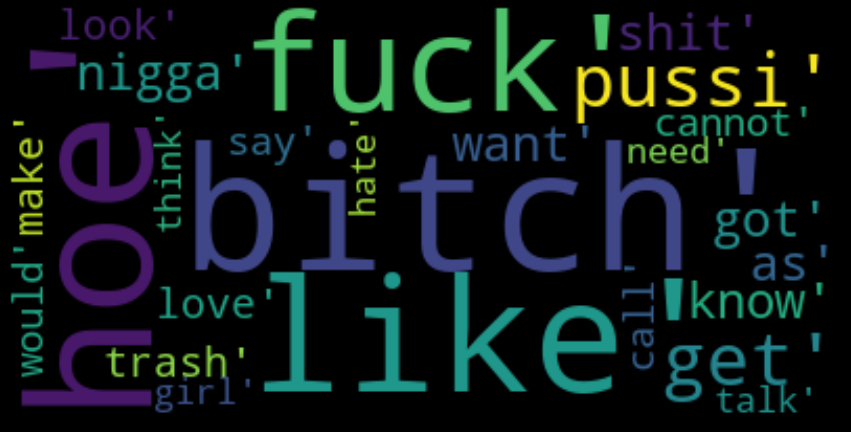

In [1084]:
get_wordcloud(str(cnt.most_common(25)))

### Bag-of-Words & Logistic Regression with Oversampling

In [1156]:
n_off, n_none, n_hate = df['class'].value_counts()
n_hate, n_off, n_none 

(1430, 19190, 4163)

In [1157]:
df_hate = df[df['class'] == 0]
df_off = df[df['class'] == 1]
df_none = df[df['class'] == 2]

In [1158]:
df_hate_over = df_hate.sample(n_off, replace=True, random_state=0)
df_none_over = df_none.sample(n_off, replace=True, random_state=0)
df_over = pd.concat([df_off, df_hate_over, df_none_over], axis=0)

print('Random over-sampling:')
print(df_over['class'].value_counts())

Random over-sampling:
1    19190
0    19190
2    19190
Name: class, dtype: int64


In [1159]:
x = df_over['tweet']
y = df_over.drop('tweet', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y,\
test_size = 0.10, random_state = 42, stratify=df_over['class'])

In [1160]:
def bow_vectorizer(c_train, c_vad):
    vectorizer = CountVectorizer()
    X_train = vectorizer.fit_transform(c_train)
    X_vad = vectorizer.transform(c_vad)
    return X_train, X_vad

In [1161]:
x_train, x_test = bow_vectorizer(x_train, x_test)
x_train.shape, x_test.shape

((51813, 15059), (5757, 15059))

In [1162]:
model = MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [1163]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.83      0.89      0.86      1919
     class 1       0.84      0.82      0.83      1919
     class 2       0.93      0.89      0.91      1919

    accuracy                           0.87      5757
   macro avg       0.87      0.87      0.87      5757
weighted avg       0.87      0.87      0.87      5757

